# Handwriting Recognition

<br>

The goal of this project is to predict handwriting recognition training neural network models i.e. FNN (Feedforward Neural Network), CNN (Convolution Neural Network), CRNN (Convolution Recurrent Neural Network).

* References: https://www.kaggle.com/samfc10/handwriting-recognition-using-crnn-in-keras

---

### <b>Team StatLa<b>

<br> 
    
Team Partners:
* $Evangelia Arseniou$ p2822026<br />
* $Paraskevi Barmpa$ p2822013 <br />
* $Sotiria Ligkou$ p2822023<br />
> MSc in Business Analytics <br />
> Athens University of Economics and Business <br />
> Machine Learning and Content Analytics <br />
> Professor: H. Papageorgiou (xaris@ilsp.gr) <br />
> Assistant responsible for this assignment: G. Perakis (gperakis@aueb.gr) <br />

In [1]:
#Set the working directory
%cd "C:\Users\Eva\Desktop\ASSIGNMENT"

In [2]:
# Libraries
import pandas as pd 
import numpy as np 
import cv2
import matplotlib.pyplot as plt 

### Load data

* For the purpose of this project we used hundreds of thousands of images of handwritten names. More specifically, there are 206,799 first names and 207,024 surnames in total. The data was divided into a training set (331,059), testing set (41,382), and validation set (41,382).
<br>

Data are available in https://www.kaggle.com/landlord/handwriting-recognition. 

* Read the `train` dataset

In [3]:
train = pd.read_csv('written_name_train_v2.csv')
train.head()

,FILENAME,IDENTITY
0,TRAIN_00001.jpg,BALTHAZAR
1,TRAIN_00002.jpg,SIMON
2,TRAIN_00003.jpg,BENES
3,TRAIN_00004.jpg,LA LOVE
4,TRAIN_00005.jpg,DAPHNE


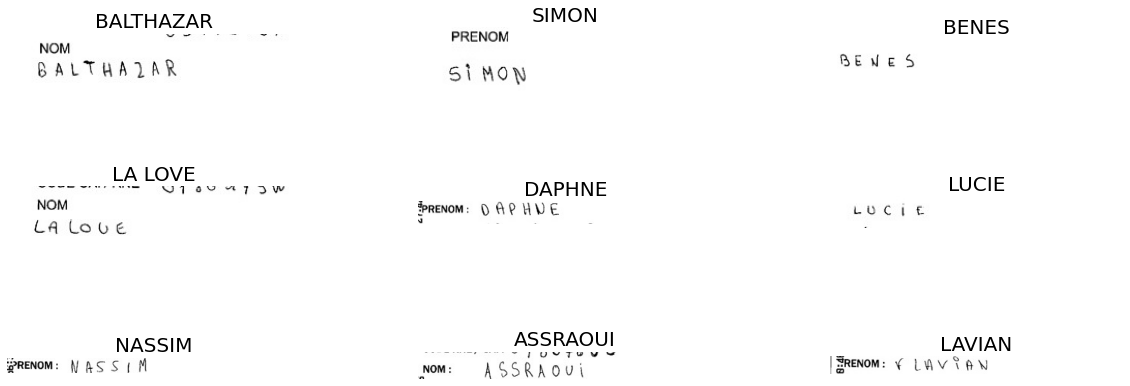

In [4]:
# Plot some train images with each title
fig = plt.figure(figsize=(20, 15))
 
for i in range(9):   
    ax = fig.add_subplot(3, 3, i+1)
    img = 'train_v2/train/'+train.loc[i, 'FILENAME']
    image = cv2.imread(img)
    plt.imshow(image)
    plt.axis('off')
    plt.title(train.loc[i, 'IDENTITY'], fontsize=20)
    
plt.subplots_adjust(wspace=0.4, hspace=-0.7)

In [5]:
#checking the data types of the columns
train.dtypes

FILENAME    object
IDENTITY    object
dtype: object

In [6]:
# Upper case characters - convert all Characters in IDENTITY column to Upper Case in train set
train.loc[:,'IDENTITY'] = train.loc[:, 'IDENTITY'].str.upper()

In [7]:
# Describe train dataset
display(train.describe(include="all"))

,FILENAME,IDENTITY
count,330961,330396
unique,330961,100526
top,TRAIN_304343.jpg,THOMAS
freq,1,1825


* Read the `validation` dataset

In [8]:
validation = pd.read_csv('written_name_validation_v2.csv')
validation.head()

,FILENAME,IDENTITY
0,VALIDATION_0001.jpg,BILEL
1,VALIDATION_0002.jpg,LAUMIONIER
2,VALIDATION_0003.jpg,LEA
3,VALIDATION_0004.jpg,JEAN-ROCH
4,VALIDATION_0005.jpg,RUPP


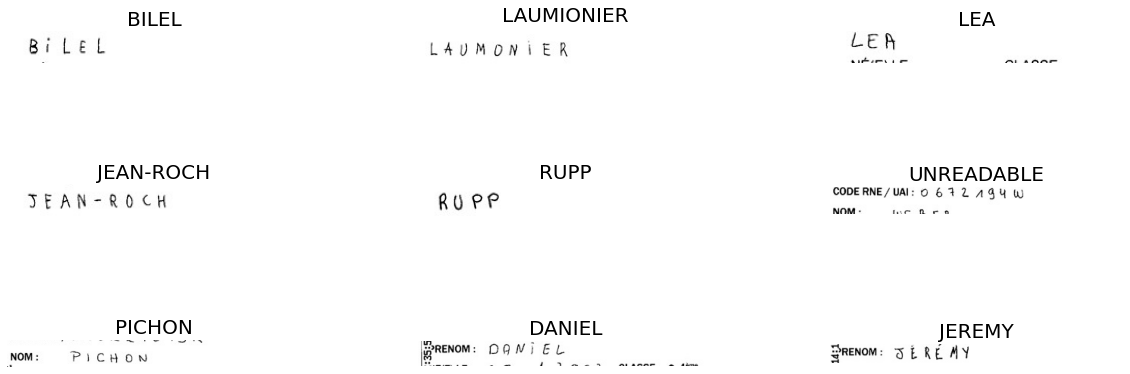

In [9]:
# Plot some validation images with each title
fig = plt.figure(figsize=(20, 15))
 
for i in range(9):   
    ax = fig.add_subplot(3, 3, i+1)
    img = 'validation_v2/validation/'+validation.loc[i, 'FILENAME']
    image = cv2.imread(img)
    plt.imshow(image)
    plt.axis('off')
    plt.title(validation.loc[i, 'IDENTITY'], fontsize=20)
    
plt.subplots_adjust(wspace=0.4, hspace=-0.7)

In [10]:
#checking the data types of the columns
validation.dtypes

FILENAME    object
IDENTITY    object
dtype: object

In [11]:
# Upper case characters - convert all Characters in IDENTITY column to Upper Case in validation set
validation.loc[:,'IDENTITY'] = validation.loc[:, 'IDENTITY'].str.upper()

In [12]:
# Describe validation dataset
display(validation.describe(include="all"))

,FILENAME,IDENTITY
count,41370,41292
unique,41370,20226
top,VALIDATION_33986.jpg,THOMAS
freq,1,219


* Read the `test` dataset

In [13]:
test = pd.read_csv("written_name_test_v2.csv")
test.head()

,FILENAME,IDENTITY
0,TEST_0001.jpg,KEVIN
1,TEST_0002.jpg,CLOTAIRE
2,TEST_0003.jpg,LENA
3,TEST_0004.jpg,JULES
4,TEST_0005.jpg,CHERPIN


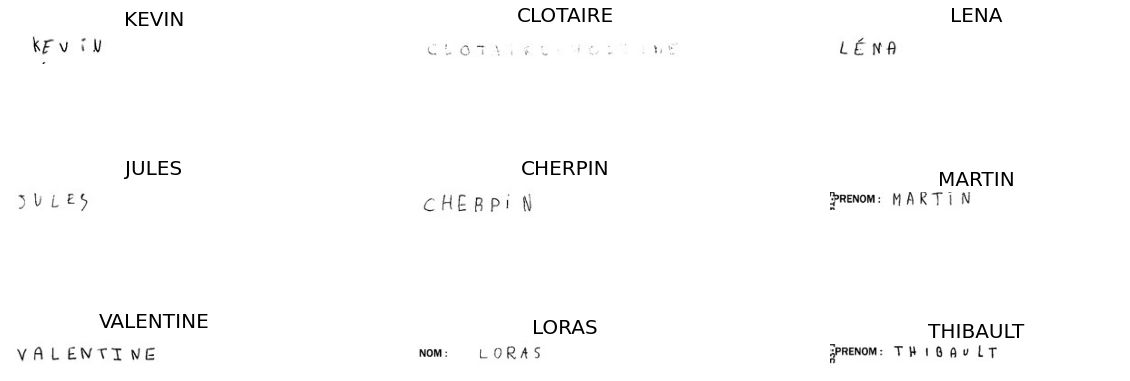

In [14]:
# Plot some test images with each title
fig = plt.figure(figsize=(20, 15))
 
for i in range(9):   
    ax = fig.add_subplot(3, 3, i+1)
    img = 'test_v2/test/'+test.loc[i, 'FILENAME']
    image = cv2.imread(img)
    plt.imshow(image)
    plt.axis('off')
    plt.title(test.loc[i, 'IDENTITY'], fontsize=20)
    
plt.subplots_adjust(wspace=0.4, hspace=-0.7)

In [15]:
#checking the data types of the columns
test.dtypes

FILENAME    object
IDENTITY    object
dtype: object

In [16]:
# Upper case characters - convert all Characters in IDENTITY column to Upper Case in test set
test.loc[:,'IDENTITY'] = test.loc[:, 'IDENTITY'].str.upper()

In [17]:
# Describe test dataset
display(test.describe(include="all"))

,FILENAME,IDENTITY
count,41370,41300
unique,41370,20277
top,TEST_17262.jpg,THOMAS
freq,1,227


### Data cleaning

* Check for NAs

In [18]:
#checking how many NA values there are in train dataset
train.isna().sum()

FILENAME      0
IDENTITY    565
dtype: int64

In [19]:
#checking how many NA values there are in validation dataset
validation.isna().sum()

FILENAME     0
IDENTITY    78
dtype: int64

In [20]:
#checking how many NA values there are in test dataset
test.isna().sum()

FILENAME     0
IDENTITY    70
dtype: int64

* Drop Nas

In [21]:
#drop NAs from the three datasets setting axis=0 in order to refer to rows that will be removed and 
#also setting inplace = True to overwrite the existing dataframe
train.dropna(axis=0, inplace=True)
validation.dropna(axis=0, inplace=True)
test.dropna(axis=0, inplace=True)

* Check for <b>"UNREADABLE"</b> words in `train` dataset

In [22]:
#check how many words in IDENTITY column contain "UNR" in order to indicate if there is any mispelling 
#in the word "UNREADABLE" in train set
unr_words = train[train['IDENTITY'].str.contains("UNRE")]
unr_words.IDENTITY.unique()

array(['UNREADABLE', 'UNREABLE', 'UNREDABLE'], dtype=object)

In [23]:
#Check the number of UNREADABLE in train set
unreadable_train = train[train['IDENTITY'].isin(['UNREADABLE', 'UNREABLE', 'UNREDABLE'])]
unreadable_train.reset_index(inplace = True, drop=True)
print("Number of unreadable Images " + str(len(unreadable_train)))

Number of unreadable Images 104


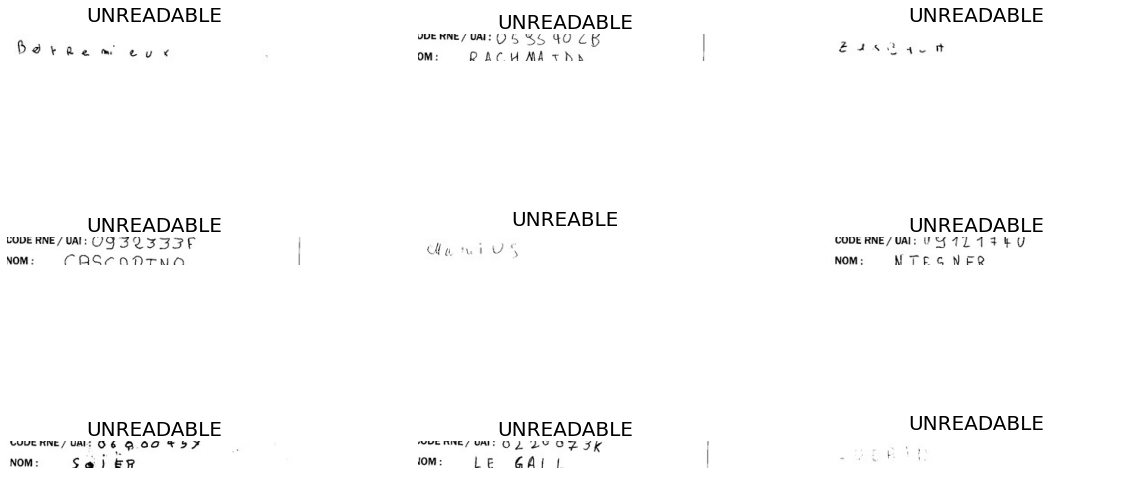

In [24]:
# Display some unreadable words in train dataset
fig = plt.figure(figsize=(20, 15))
 
for i in range(9):   
    ax = fig.add_subplot(3, 3, i+1)
    img = 'train_v2/train/'+unreadable_train.loc[i, 'FILENAME']
    image = cv2.imread(img)
    plt.imshow(image)
    plt.axis('off')
    plt.title(unreadable_train.loc[i, 'IDENTITY'], fontsize=20)
    
plt.subplots_adjust(wspace=0.4, hspace=-0.5)

* Check for <b>"UNREADABLE"</b> words in `validation` dataset

In [25]:
#check how many words in IDENTITY column contain "UNR" in order to indicate if there is any mispelling 
#in the word "unreadable" in validation set
unr_words = validation[validation['IDENTITY'].str.contains("UNRE")]
unr_words.IDENTITY.unique()

array(['UNREADABLE'], dtype=object)

In [26]:
#Check the number of Unreadable in validation set
unreadable_val = validation[validation['IDENTITY'] == 'UNREADABLE']
unreadable_val.reset_index(inplace = True, drop=True)
print("Number of unreadable Images " + str(len(unreadable_val)))

Number of unreadable Images 12


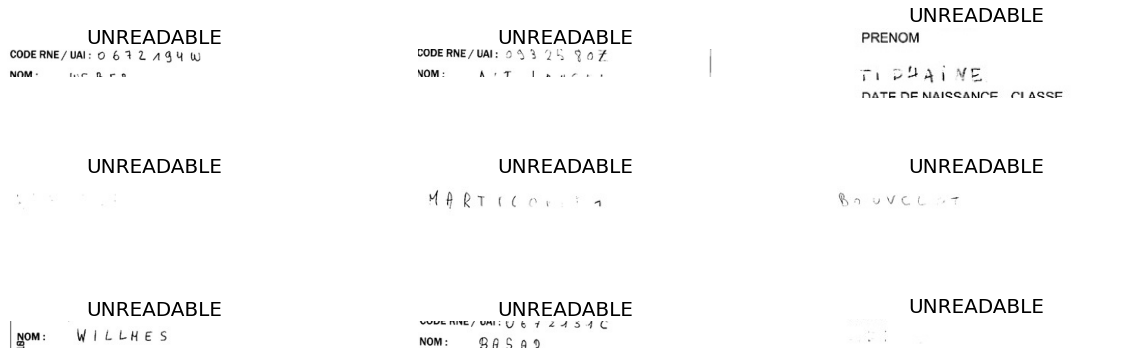

In [27]:
# Display some unreadable words in validation dataset
fig = plt.figure(figsize=(20, 10))
 
for i in range(9):   
    ax = fig.add_subplot(3, 3, i+1)
    img = 'validation_v2/validation/'+unreadable_val.loc[i, 'FILENAME']
    image = cv2.imread(img)
    plt.imshow(image)
    plt.axis('off')
    plt.title(unreadable_val.loc[i, 'IDENTITY'], fontsize=20)
    
plt.subplots_adjust(wspace=0.4, hspace=-0.5)

* Check for <b>"UNREADABLE"</b> words in `test` dataset

In [28]:
#check how many words in IDENTITY column contain "UNRE" in order to indicate if there is any mispelling 
#in the word "unreadable" in test set
unr_words = test[test['IDENTITY'].str.contains("UNRE")]
unr_words.IDENTITY.unique()

array(['UNREADABLE'], dtype=object)

In [29]:
#Check the number of Unreadable in test set
unreadable_test = test[test['IDENTITY'] == 'UNREADABLE']
unreadable_test.reset_index(inplace = True, drop=True)
print("Number of unreadable Images " + str(len(unreadable_test)))

Number of unreadable Images 11


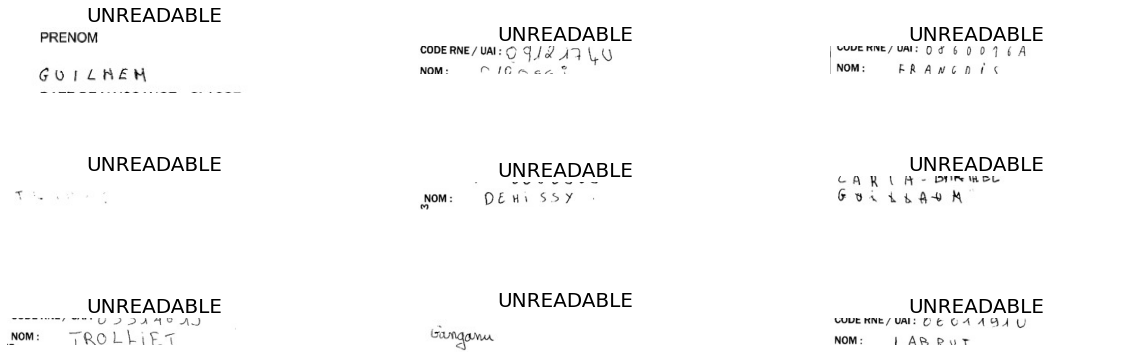

In [30]:
# Display some unreadable words in test dataset
fig = plt.figure(figsize=(20, 10))
 
for i in range(9):   
    ax = fig.add_subplot(3, 3, i+1)
    img = 'test_v2/test/'+unreadable_test.loc[i, 'FILENAME']
    image = cv2.imread(img)
    plt.imshow(image)
    plt.axis('off')
    plt.title(unreadable_test.loc[i, 'IDENTITY'], fontsize=20)
    
plt.subplots_adjust(wspace=0.4, hspace=-0.5)

* Remove <b>"UNREADABLE"</b> word from IDENTITY column in the three datasets

In [31]:
train = train[(train['IDENTITY'] != 'UNREADABLE')&(train['IDENTITY'] != 'UNREABLE')&(train['IDENTITY'] != 'UNREDABLE')]
validation = validation[validation['IDENTITY'] != 'UNREADABLE']
test = test[test['IDENTITY'] != 'UNREADABLE']

In [32]:
train.reset_index(inplace = True, drop=True) 
validation.reset_index(inplace = True, drop=True)
test.reset_index(inplace = True, drop=True)

In [33]:
#Number of rows after cleaning in each dataset
print("Length of Train Dataset ", len(train))
print("Length of Validation Dataset ", len(validation))
print("Length of Test Dataset ", len(test))

Length of Train Dataset  330292
Length of Validation Dataset  41280
Length of Test Dataset  41289


In [34]:
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot

In [35]:
train.head()

,FILENAME,IDENTITY
0,TRAIN_00001.jpg,BALTHAZAR
1,TRAIN_00002.jpg,SIMON
2,TRAIN_00003.jpg,BENES
3,TRAIN_00004.jpg,LA LOVE
4,TRAIN_00005.jpg,DAPHNE


### Image Preprocessing

<br> 
    
Image preprocessing is used to format images before the creation of the model (i.e. resizing, orienting and color corrections). Preprocessing is used to clean image data for model input. For instance, CNN model requires that all images have arrays with the same size. Another reason that makes this process necessary is the decrease of model training time. When facing large input images, the model training time could be improved by reducing the size of the aformentioned images while the model performance stays almost intact. 
<br>

<br>

For the image preprocessing we follow the below steps: 

1. Load the images as grayscale
2. Resize the images to height 64 and width 256
3. When the dimensions of an image is greater than 64x256 the image has to cropped. Otherwise, if the image is smaller it is filled with white pixels.
4. Finally, rotate the image by 90 degrees clockwise using cv2.rotate() method and cv2.ROTATE_90_CLOCKWISE

In [36]:
def image_preprocessing(image):
    # save the dimensions of the array (height - width) 
    (h, w) = image.shape
    # blank white image
    final_img = np.ones([64, 256])*255 
    # crop images that have width higher than 256
    if w > 256:
        image = image[:, :256]
    # crop images that have height greater than 64
    if h > 64:
        image = image[:64, :]
    final_img[:h, :w] = image
    # rotate the image by 90 degrees clockwise
    return cv2.rotate(final_img, cv2.ROTATE_90_CLOCKWISE)

* We choose to train the model on `30.000` images and validate on `3.000` images.

In [37]:
train_size = 30000
valid_size= 3000

* Load all `train` images and use <b>image_preprocessing</b> function to format them. In order to normalize the images to [0,1] range we divided with 255.

In [38]:
train_x = []

for i in range(train_size):
    img_dir = 'train_v2/train/'+train.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = image_preprocessing(image)
    image = image/255
    train_x.append(image)

In [39]:
valid_x = []

for i in range(valid_size):
    img_dir = 'validation_v2/validation/'+validation.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = image_preprocessing(image)
    image = image/255
    valid_x.append(image)

In [40]:
train_x = np.array(train_x).reshape(-1, 256, 64, 1)
train_x.shape

(30000, 256, 64, 1)

In [41]:
valid_x = np.array(valid_x).reshape(-1, 256, 64, 1)
valid_x.shape

(3000, 256, 64, 1)

* For the test dataset we choose `1.000` images.

In [42]:
test_size=1000

In [43]:
test_x = []

for i in range(test_size):
    img_dir = 'test_v2/test/'+test.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = image_preprocessing(image)
    image = image/255.
    test_x.append(image)

In [44]:
test_x = np.array(test_x).reshape(-1, 256, 64, 1)
test_x.shape

(1000, 256, 64, 1)

### Preparing the labels

* We have to convert the labels from characters to numbers. Each character will be represented by a number. There are 30 characters in the train dataset which are consisted of the alphabet `A-Z` and 4 special characters:
"<code>-'`</code>" and space.


In [45]:
x=set(list(' '.join(train['IDENTITY'].values)))
x

{' ',
 "'",
 '-',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '`'}

In [46]:
len(x)

30

In [47]:
characters = u"ABCDEFGHIJKLMNOPQRSTUVWXYZ-' "
max_len_labels = 24 # max length of input labels
num_of_characters = len(characters) + 1 # +1 for ctc pseudo blank
#num_predicted_labels = 30 # max length of predicted labels (arbitrarily value)
num_predicted_labels = 64 # max length of predicted labels (arbitrarily value)

* In order to convert the names to numbers we use find() method. This command returns the index of the first occurrence of the specified value. If the value is not found it returns -1.

In [48]:
def character_to_number(name):
    labels = []
    for character in name:
        x=characters.find(character)
        labels.append(x)        
    return np.array(labels)

In [49]:
def number_to_character(number):
    k = ""
    for character in number:
        if character == -1:  # CTC Blank
            break
        else:
            k+=characters[character]
    return k

In [50]:
# Show the conversion of the first 5 names
for i in range(5):
    print(train.loc[i,'IDENTITY'], character_to_number(train.loc[i, 'IDENTITY']))

BALTHAZAR [ 1  0 11 19  7  0 25  0 17]
SIMON [18  8 12 14 13]
BENES [ 1  4 13  4 18]
LA LOVE [11  0 28 11 14 21  4]
DAPHNE [ 3  0 15  7 13  4]


In [51]:
train_y = np.ones([train_size, max_len_labels]) * -1 # true labels converted to numbers and fiiled with -1
train_label_len = np.zeros([train_size, 1]) # the length of each true label (without filling)
train_input_len = np.ones([train_size, 1])*(num_predicted_labels-2) # the length of each predicted label(#timestamp-2)
train_output = np.zeros([train_size]) # dummy output for ctc loss

for i in range(train_size):
    train_label_len[i] = len(train.loc[i, 'IDENTITY'])
    train_y[i, 0:len(train.loc[i, 'IDENTITY'])]= character_to_number(train.loc[i, 'IDENTITY'])  

In [52]:
valid_y = np.ones([valid_size, max_len_labels]) * -1
valid_label_len = np.zeros([valid_size, 1])
valid_input_len = np.ones([valid_size, 1]) * (num_predicted_labels-2)
valid_output = np.zeros([valid_size])

for i in range(valid_size):
    valid_label_len[i] = len(validation.loc[i, 'IDENTITY'])
    valid_y[i, 0:len(validation.loc[i, 'IDENTITY'])]= character_to_number(validation.loc[i, 'IDENTITY'])   

In [53]:
test_y = np.ones([test_size, max_len_labels]) * -1
test_label_len = np.zeros([test_size, 1])
test_input_len = np.ones([test_size, 1]) * (num_predicted_labels-2)
test_output = np.zeros([test_size])

for i in range(test_size):
    test_label_len[i] = len(test.loc[i, 'IDENTITY'])
    test_y[i, 0:len(test.loc[i, 'IDENTITY'])]= character_to_number(test.loc[i, 'IDENTITY'])

## Deep Neural Network

Machine learning techniques have been widely applied in various areas such as pattern recognition, natural language processing, and computational learning. A deep neural network (DNN) is an artificial neural network (ANN) with multiple layers between the input and output layers. They are composed of units that combine multiple inputs and produce a single output. The large datasets in the cloud made it possible to build more accurate models by using additional and larger layers to capture higher levels of patterns. The two phases of neural networks are called training and prediction, and they refer to development versus production. The developer chooses the number of layers and the type of neural network, and training determines the weights.

For more information you could visit https://viso.ai/deep-learning/deep-neural-network-three-popular-types/ .

### Building our models:  
  1. <i>FEEDFORWARD</i> 
  2. <i>CNN (with and without data augmentation)</i> 
  3. <i>CRNN</i>

In [54]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Bidirectional,Flatten, LSTM, Dense, Lambda, Activation, BatchNormalization, Dropout

### 1. Baseline model: Feedforward Network

A feedforward neural network consists of a number of simple neuron organized in layers. Every unit in a layer is connected with all the units (nodes) in the previous layer. Each connection may have a different strength or weight. The weights on these connections encode the knowledge of a network. Data enters at the inputs and passes through the network, layer by layer, until it arrives at the outputs. During normal operation, that is when it acts as a classifier, there is no feedback between layers. This is why they are called feedforward neural networks.

(Reference: https://www.fon.hum.uva.nl/praat/manual/Feedforward_neural_networks_1__What_is_a_feedforward_ne.html)

In [55]:
# flattening the training sets
d1, d2, d3, d4 = train_x.shape
train_xmlp = train_x.reshape((d1, d2*d3*d4))
train_xmlp.shape

(30000, 16384)

In [56]:
# model imports
network = Sequential()

network.add(Dense(512, activation='relu',input_shape=(256 * 64,)))
network.add(Dense(24,activation='softmax'))

In [57]:
#compile the model
network.compile(optimizer='rmsprop',loss=tf.keras.losses.MeanAbsoluteError(),metrics=['accuracy'])

In [58]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               8389120   
_________________________________________________________________
dense_1 (Dense)              (None, 24)                12312     
Total params: 8,401,432
Trainable params: 8,401,432
Non-trainable params: 0
_________________________________________________________________


In [59]:
# setting the early stoping callback
es = tf.keras.callbacks.EarlyStopping(
                   monitor = 'val_loss',  # which metric we want to use as criterion to stop training
                   min_delta = 0, # Minimum change in the monitored quantity to qualify as an improvement
                   patience = 3,  # we set 3 epochs before stopping
                   verbose = 1,   # verbosity level
                   mode = 'auto',
                   restore_best_weights = True)

* Now we are ready to train our model for 30 epochs, batch size equal to 128, using callbacks and validation_split equal to 0.1 meaning that Keras will split apart a fraction (10% in this example) of the training data to be used as validation data. 

In [60]:
history_mlp = network.fit(train_xmlp, train_y, epochs=30, batch_size=128, validation_split=0.1, callbacks=es)

Epoch 1/30
211/211 [==============================] - 15s 69ms/step - loss: 3.4496 - accuracy: 0.1493 - val_loss: 3.4263 - val_accuracy: 0.1513
Epoch 2/30
211/211 [==============================] - 14s 69ms/step - loss: 3.4494 - accuracy: 0.1498 - val_loss: 3.4263 - val_accuracy: 0.1513
Epoch 3/30
211/211 [==============================] - 15s 69ms/step - loss: 3.4494 - accuracy: 0.1498 - val_loss: 3.4263 - val_accuracy: 0.1513
Epoch 4/30
211/211 [==============================] - 14s 69ms/step - loss: 3.4494 - accuracy: 0.1498 - val_loss: 3.4263 - val_accuracy: 0.1513
Restoring model weights from the end of the best epoch.
Epoch 00004: early stopping


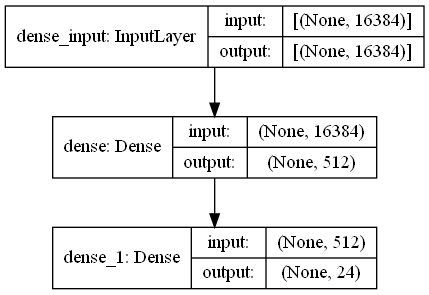

In [61]:
tf.keras.utils.plot_model(network,to_file="FNN.png", show_shapes=True)

### Feedforward model - Evaluation

In [62]:
test_images = test_x.reshape((1000, 256 * 64))

In [63]:
# Evaluation
test_loss, test_acc = network.evaluate(test_images, test_y)

32/32 [==============================] - 0s 8ms/step - loss: 3.4611 - accuracy: 0.1490


In [64]:
print('test_accuracy:', "{:.2%}".format(test_acc))

test_accuracy: 14.90%


### 2.  CNN model

In [65]:
# model imports
cnn_model = Sequential()

cnn_model.add(Conv2D(64, (3, 3), padding='same', input_shape=(256, 64, 1)))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D(128, (3, 3), padding='same'))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(1, 2)))
cnn_model.add(Dropout(0.3))
cnn_model.add(BatchNormalization())

cnn_model.add(Flatten())
cnn_model.add(Dropout(0.3))

cnn_model.add(Dense(128, activation='relu', kernel_initializer='he_normal', name='dense1'))
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.2))

cnn_model.add(Dense(24))
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Activation('softmax'))

In [66]:
#compile the model
optimizer_cnn = 'adam'
cnn_model.compile(loss=tf.keras.losses.MeanAbsoluteError(), optimizer=optimizer_cnn, metrics=['accuracy'])

In [67]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 64, 64)       640       
_________________________________________________________________
activation (Activation)      (None, 256, 64, 64)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 32, 64)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 32, 64)       256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 32, 128)      73856     
_________________________________________________________________
activation_1 (Activation)    (None, 128, 32, 128)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 16, 128)     

In [68]:
his = cnn_model.fit(train_x, train_y, validation_data=(valid_x, valid_y), epochs=30, batch_size=128, callbacks=es)

Epoch 1/30
235/235 [==============================] - 603s 3s/step - loss: 3.4365 - accuracy: 0.2022 - val_loss: 3.4342 - val_accuracy: 0.1497
Epoch 2/30
235/235 [==============================] - 605s 3s/step - loss: 3.4347 - accuracy: 0.2093 - val_loss: 3.4300 - val_accuracy: 0.2317
Epoch 3/30
235/235 [==============================] - 602s 3s/step - loss: 3.4334 - accuracy: 0.2228 - val_loss: 3.4300 - val_accuracy: 0.2317
Epoch 4/30
235/235 [==============================] - 606s 3s/step - loss: 3.4331 - accuracy: 0.2267 - val_loss: 3.4300 - val_accuracy: 0.2317
Epoch 5/30
235/235 [==============================] - 601s 3s/step - loss: 3.4332 - accuracy: 0.2253 - val_loss: 3.4300 - val_accuracy: 0.2317
Restoring model weights from the end of the best epoch.
Epoch 00005: early stopping


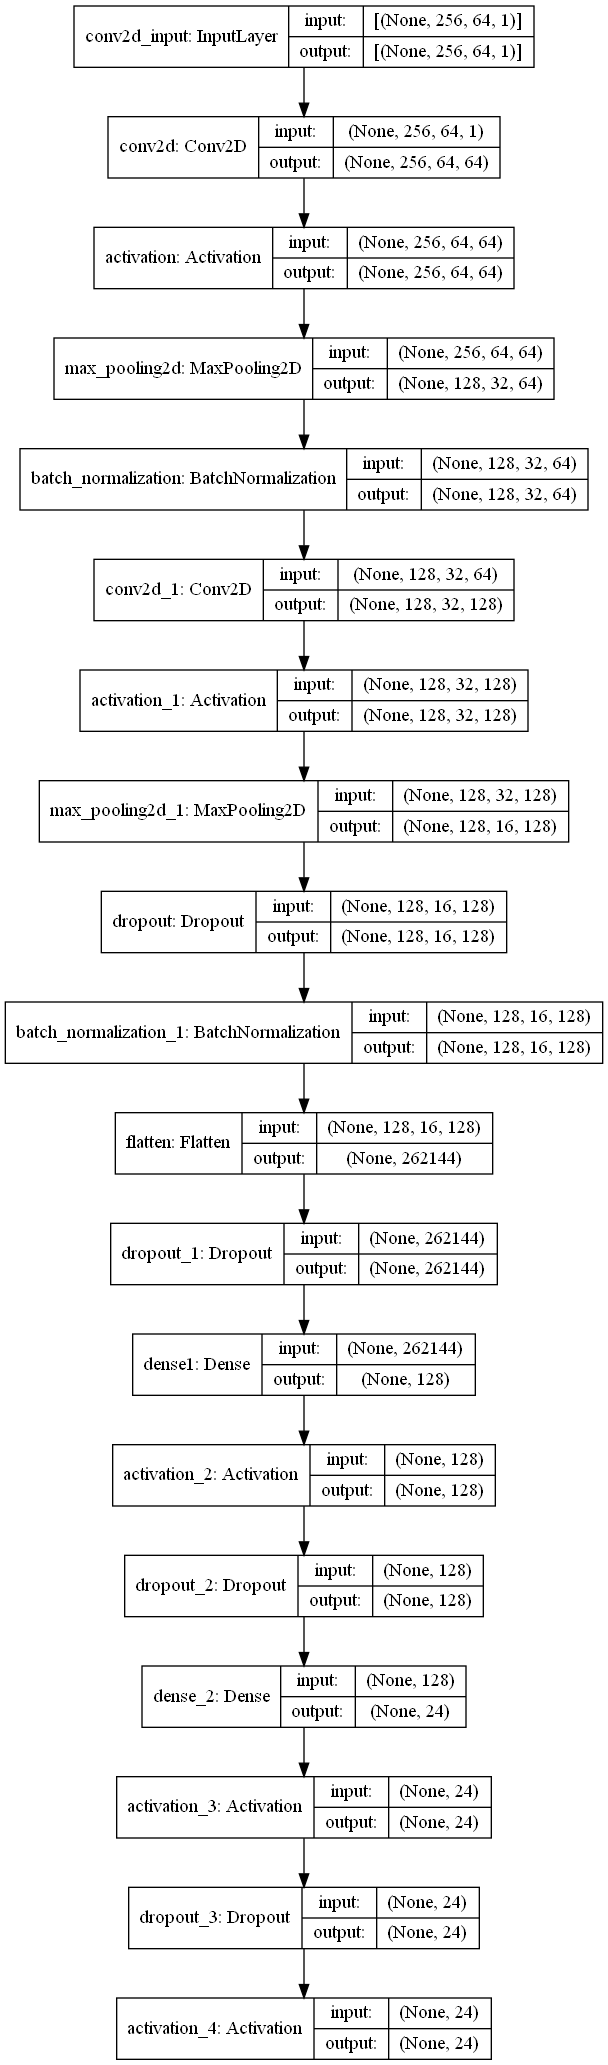

In [69]:
tf.keras.utils.plot_model(cnn_model,to_file="CNN.png", show_shapes=True) 

### CNN Model - Evaluation

In [70]:
# Evaluate the trained model on the test set
score_cnn = cnn_model.evaluate(test_x, # features
                               test_y, # labels
                               verbose=1) # the most extended verbose

print(f'Test loss: {score_cnn[0]}:')
print('Test accuracy: {:.3f} %'.format(100 * score_cnn[1]))

32/32 [==============================] - 5s 149ms/step - loss: 3.4452 - accuracy: 0.2350
Test loss: 3.4452083110809326:
Test accuracy: 23.500 %


## Data Augmentation on CNN model

Image augmentation are manipulations applied to images to create different versions of similar content in order to expose the model to a wider array of training examples. For example, randomly altering rotation, brightness, or scale of an input image requires that a model consider what an image subject looks like in a variety of situations. Image augmentation creates new training examples out of existing training data. 


In [71]:
from IPython.display import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

As an example, we choose to display the first image of the train dataset with different versions (hotizontal flip augmentation, random brightness augmentation, random zoom augmentation)

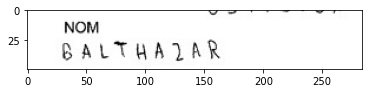

In [72]:
img = 'train_v2/train/'+train.loc[0, 'FILENAME']
image = cv2.imread(img)
plt.imshow(image)

In [73]:
PATH = "validation_v2/validation/"
image = Image(filename = PATH + "VALIDATION_0001.jpg", width=1000, height=1000)

In [74]:
# Libraries
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

### a) Horizontal Flip Augmentation

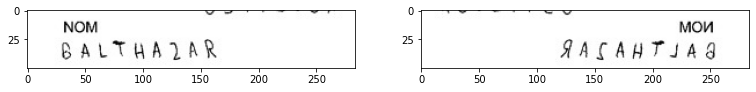

In [75]:
fig = plt.figure(figsize=(20, 10))

# load the image
img = load_img('train_v2/train/'+train.loc[0, 'FILENAME'])
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(2):
   # define subplot
   pyplot.subplot(330 + 1 + i)
   # generate batch of images
   batch = it.next()
   # convert to unsigned integers for viewing
   image = batch[0].astype('uint8')
   # plot raw pixel data
   pyplot.imshow(image)
# show the figure
pyplot.show()

### b) Random Brightness Augmentation

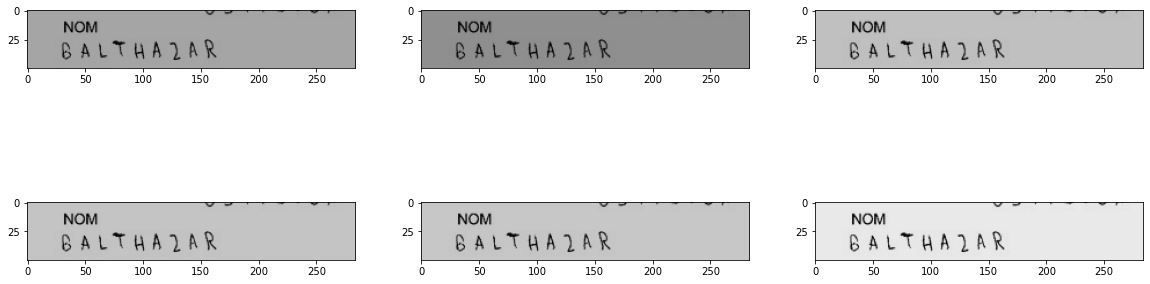

In [76]:
fig = plt.figure(figsize=(20, 10))

# load the image
img = load_img('train_v2/train/'+train.loc[0, 'FILENAME'])
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.4,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(6):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

### c) Random Zoom Augmentation

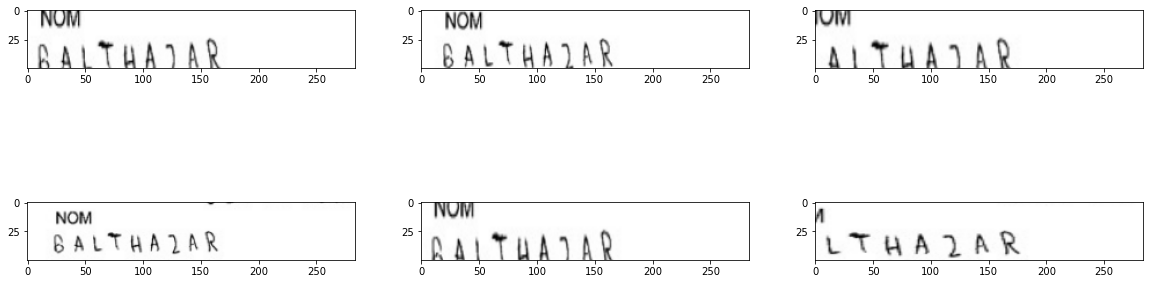

In [77]:
fig = plt.figure(figsize=(20, 10))

# load the image
img = load_img('train_v2/train/'+train.loc[0, 'FILENAME'])
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(6):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

### 2.1. Data augmentation on CNN model using Zoom and Brightness

In [78]:
aug2=ImageDataGenerator(zoom_range=[0.4,1.0],brightness_range=[0.2,1.0])

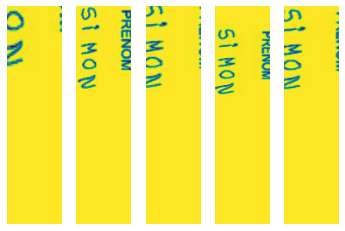

In [79]:
from matplotlib import pyplot as plt

gen = aug2.flow(train_x[1:2], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()

In [80]:
his_aug2 = cnn_model.fit(aug2.flow(train_x, train_y, batch_size=128), epochs=30, validation_data=(valid_x, valid_y), callbacks=es)

Epoch 1/30
235/235 [==============================] - 602s 3s/step - loss: 3.4352 - accuracy: 0.2182 - val_loss: 3.4547 - val_accuracy: 0.0913
Epoch 2/30
235/235 [==============================] - 603s 3s/step - loss: 3.4345 - accuracy: 0.2098 - val_loss: 3.4342 - val_accuracy: 0.1497
Epoch 3/30
235/235 [==============================] - 603s 3s/step - loss: 3.4341 - accuracy: 0.1851 - val_loss: 3.4306 - val_accuracy: 0.1513
Epoch 4/30
235/235 [==============================] - 603s 3s/step - loss: 3.4342 - accuracy: 0.1863 - val_loss: 3.4306 - val_accuracy: 0.1513
Epoch 5/30
235/235 [==============================] - 603s 3s/step - loss: 3.4348 - accuracy: 0.1803 - val_loss: 3.4306 - val_accuracy: 0.1513
Epoch 6/30
235/235 [==============================] - 604s 3s/step - loss: 3.4337 - accuracy: 0.1895 - val_loss: 3.4306 - val_accuracy: 0.1513
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping


In [81]:
# Evaluate the trained model on the test set
score_cnn = cnn_model.evaluate(aug2.flow(test_x, # features
                               test_y), # labels
                               verbose=1) # the most extended verbose

print(f'Test loss: {score_cnn[0]}:')
print('Test accuracy: {:.3f} %'.format(100 * score_cnn[1]))

32/32 [==============================] - 5s 149ms/step - loss: 3.4446 - accuracy: 0.1500
Test loss: 3.44462513923645:
Test accuracy: 15.000 %


### 2.2. Data augmentation on CNN model with rotation

In [82]:
rot=ImageDataGenerator(
    rotation_range=30,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
    )

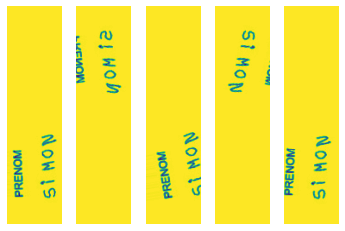

In [83]:
from matplotlib import pyplot as plt

gen = rot.flow(train_x[1:2], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()

In [84]:
augm_rot = cnn_model.fit(rot.flow(train_x, train_y, batch_size=128), epochs=30, validation_data=(valid_x, valid_y), callbacks=es)

Epoch 1/30
235/235 [==============================] - 600s 3s/step - loss: 3.4333 - accuracy: 0.1791 - val_loss: 3.4306 - val_accuracy: 0.1513
Epoch 2/30
235/235 [==============================] - 600s 3s/step - loss: 3.4336 - accuracy: 0.2238 - val_loss: 3.4306 - val_accuracy: 0.1513
Epoch 3/30
235/235 [==============================] - 601s 3s/step - loss: 3.4337 - accuracy: 0.2260 - val_loss: 3.4300 - val_accuracy: 0.2317
Epoch 4/30
235/235 [==============================] - 602s 3s/step - loss: 3.4346 - accuracy: 0.2244 - val_loss: 3.4300 - val_accuracy: 0.2317
Epoch 5/30
235/235 [==============================] - 602s 3s/step - loss: 3.4344 - accuracy: 0.2259 - val_loss: 3.4300 - val_accuracy: 0.2317
Epoch 6/30
235/235 [==============================] - 603s 3s/step - loss: 3.4342 - accuracy: 0.2257 - val_loss: 3.4300 - val_accuracy: 0.2317
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping


In [85]:
# Evaluate the trained model on the test set
score_augm_rot = cnn_model.evaluate(rot.flow(test_x, # features
                               test_y), # labels
                               verbose=1) # the most extended verbose

print(f'Test loss: {score_augm_rot[0]}:')
print('Test accuracy: {:.3f} %'.format(100 * score_augm_rot[1]))

32/32 [==============================] - 5s 151ms/step - loss: 3.4452 - accuracy: 0.2350
Test loss: 3.445208787918091:
Test accuracy: 23.500 %


## 3. CRNN model

In [86]:
#Construct the CRNN model

input_data = Input(shape=(256, 64, 1), name='input')

crnn_model = Conv2D(32, (3, 3), padding='same', name='conv1', kernel_initializer='he_normal')(input_data)  
crnn_model = BatchNormalization()(crnn_model)
crnn_model = Activation('relu')(crnn_model)
crnn_model = MaxPooling2D(pool_size=(2, 2), name='max1')(crnn_model)

crnn_model = Conv2D(64, (3, 3), padding='same', name='conv2', kernel_initializer='he_normal')(crnn_model)
crnn_model = BatchNormalization()(crnn_model)
crnn_model = Activation('relu')(crnn_model)
crnn_model = MaxPooling2D(pool_size=(2, 2), name='max2')(crnn_model)
crnn_model = Dropout(0.3)(crnn_model)

crnn_model = Conv2D(128, (3, 3), padding='same', name='conv3', kernel_initializer='he_normal')(crnn_model)
crnn_model = BatchNormalization()(crnn_model)
crnn_model = Activation('relu')(crnn_model)
crnn_model = MaxPooling2D(pool_size=(1, 2), name='max3')(crnn_model)
crnn_model = Dropout(0.3)(crnn_model)

# CNN to RNN
crnn_model = Reshape(target_shape=((64, 1024)), name='reshape')(crnn_model)
crnn_model = Dense(64, activation='relu', kernel_initializer='he_normal', name='dense1')(crnn_model)

## RNN
crnn_model = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm1')(crnn_model)
crnn_model = Bidirectional(LSTM(256, return_sequences=True), name = 'lstm2')(crnn_model)

## OUTPUT
crnn_model = Dense(num_of_characters, kernel_initializer='he_normal',name='dense2')(crnn_model)
predict_y = Activation('softmax', name='softmax')(crnn_model)

crnn_model = Model(inputs=input_data, outputs=predict_y)

In [87]:
crnn_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 256, 64, 1)]      0         
_________________________________________________________________
conv1 (Conv2D)               (None, 256, 64, 32)       320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 256, 64, 32)       128       
_________________________________________________________________
activation_5 (Activation)    (None, 256, 64, 32)       0         
_________________________________________________________________
max1 (MaxPooling2D)          (None, 128, 32, 32)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 128, 32, 64)       18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128, 32, 64)       256   

In [88]:
#the ctc loss function

def ctc_lambda_func(args):
    predict_y, labels, input_length, label_length = args
    predict_y = predict_y[:, 2:, :]
    return K.ctc_batch_cost(labels, predict_y, input_length, label_length)

In [89]:
labels = Input(name='gtruth_labels', shape=[max_len_labels], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')

ctc_loss = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([predict_y, labels, input_length, label_length])
model_final = Model(inputs=[input_data, labels, input_length, label_length], outputs=ctc_loss)

### Train our model: Compile the built model with RMSprop Optimizer and CTC Loss function

In [90]:
#optimizerCrnn=Adam(learning_rate = 0.0001) #previous optimizer
optimizerCrnn = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [91]:
#compile the model
#use a dummy lambda function for the loss (take only predict_y as we have already take labels as input 
#to the model earlier)

model_final.compile(loss={'ctc': lambda y_true, predict_y: predict_y}, optimizer=optimizerCrnn, metrics=['accuracy'])

In [92]:
crnn_history = model_final.fit(x=[train_x, train_y, train_input_len, train_label_len], y=train_output, 
                validation_data=([valid_x, valid_y, valid_input_len, valid_label_len], valid_output),
                epochs=30, batch_size=128)

Epoch 1/30
235/235 [==============================] - 626s 3s/step - loss: 21.9195 - accuracy: 0.0000e+00 - val_loss: 25.1629 - val_accuracy: 0.0000e+00
Epoch 2/30
235/235 [==============================] - 635s 3s/step - loss: 12.4277 - accuracy: 6.6667e-04 - val_loss: 23.5285 - val_accuracy: 0.0000e+00
Epoch 3/30
235/235 [==============================] - 640s 3s/step - loss: 5.1888 - accuracy: 0.0742 - val_loss: 6.0840 - val_accuracy: 0.0510
Epoch 4/30
235/235 [==============================] - 641s 3s/step - loss: 3.3161 - accuracy: 0.2740 - val_loss: 2.9350 - val_accuracy: 0.3850
Epoch 5/30
235/235 [==============================] - 643s 3s/step - loss: 2.6023 - accuracy: 0.4215 - val_loss: 2.8807 - val_accuracy: 0.4330
Epoch 6/30
235/235 [==============================] - 647s 3s/step - loss: 2.1952 - accuracy: 0.5160 - val_loss: 2.4442 - val_accuracy: 0.5397
Epoch 7/30
235/235 [==============================] - 650s 3s/step - loss: 1.9373 - accuracy: 0.5731 - val_loss: 6.9122 - 

### Plot model

In [93]:
from keras.utils.vis_utils import plot_model

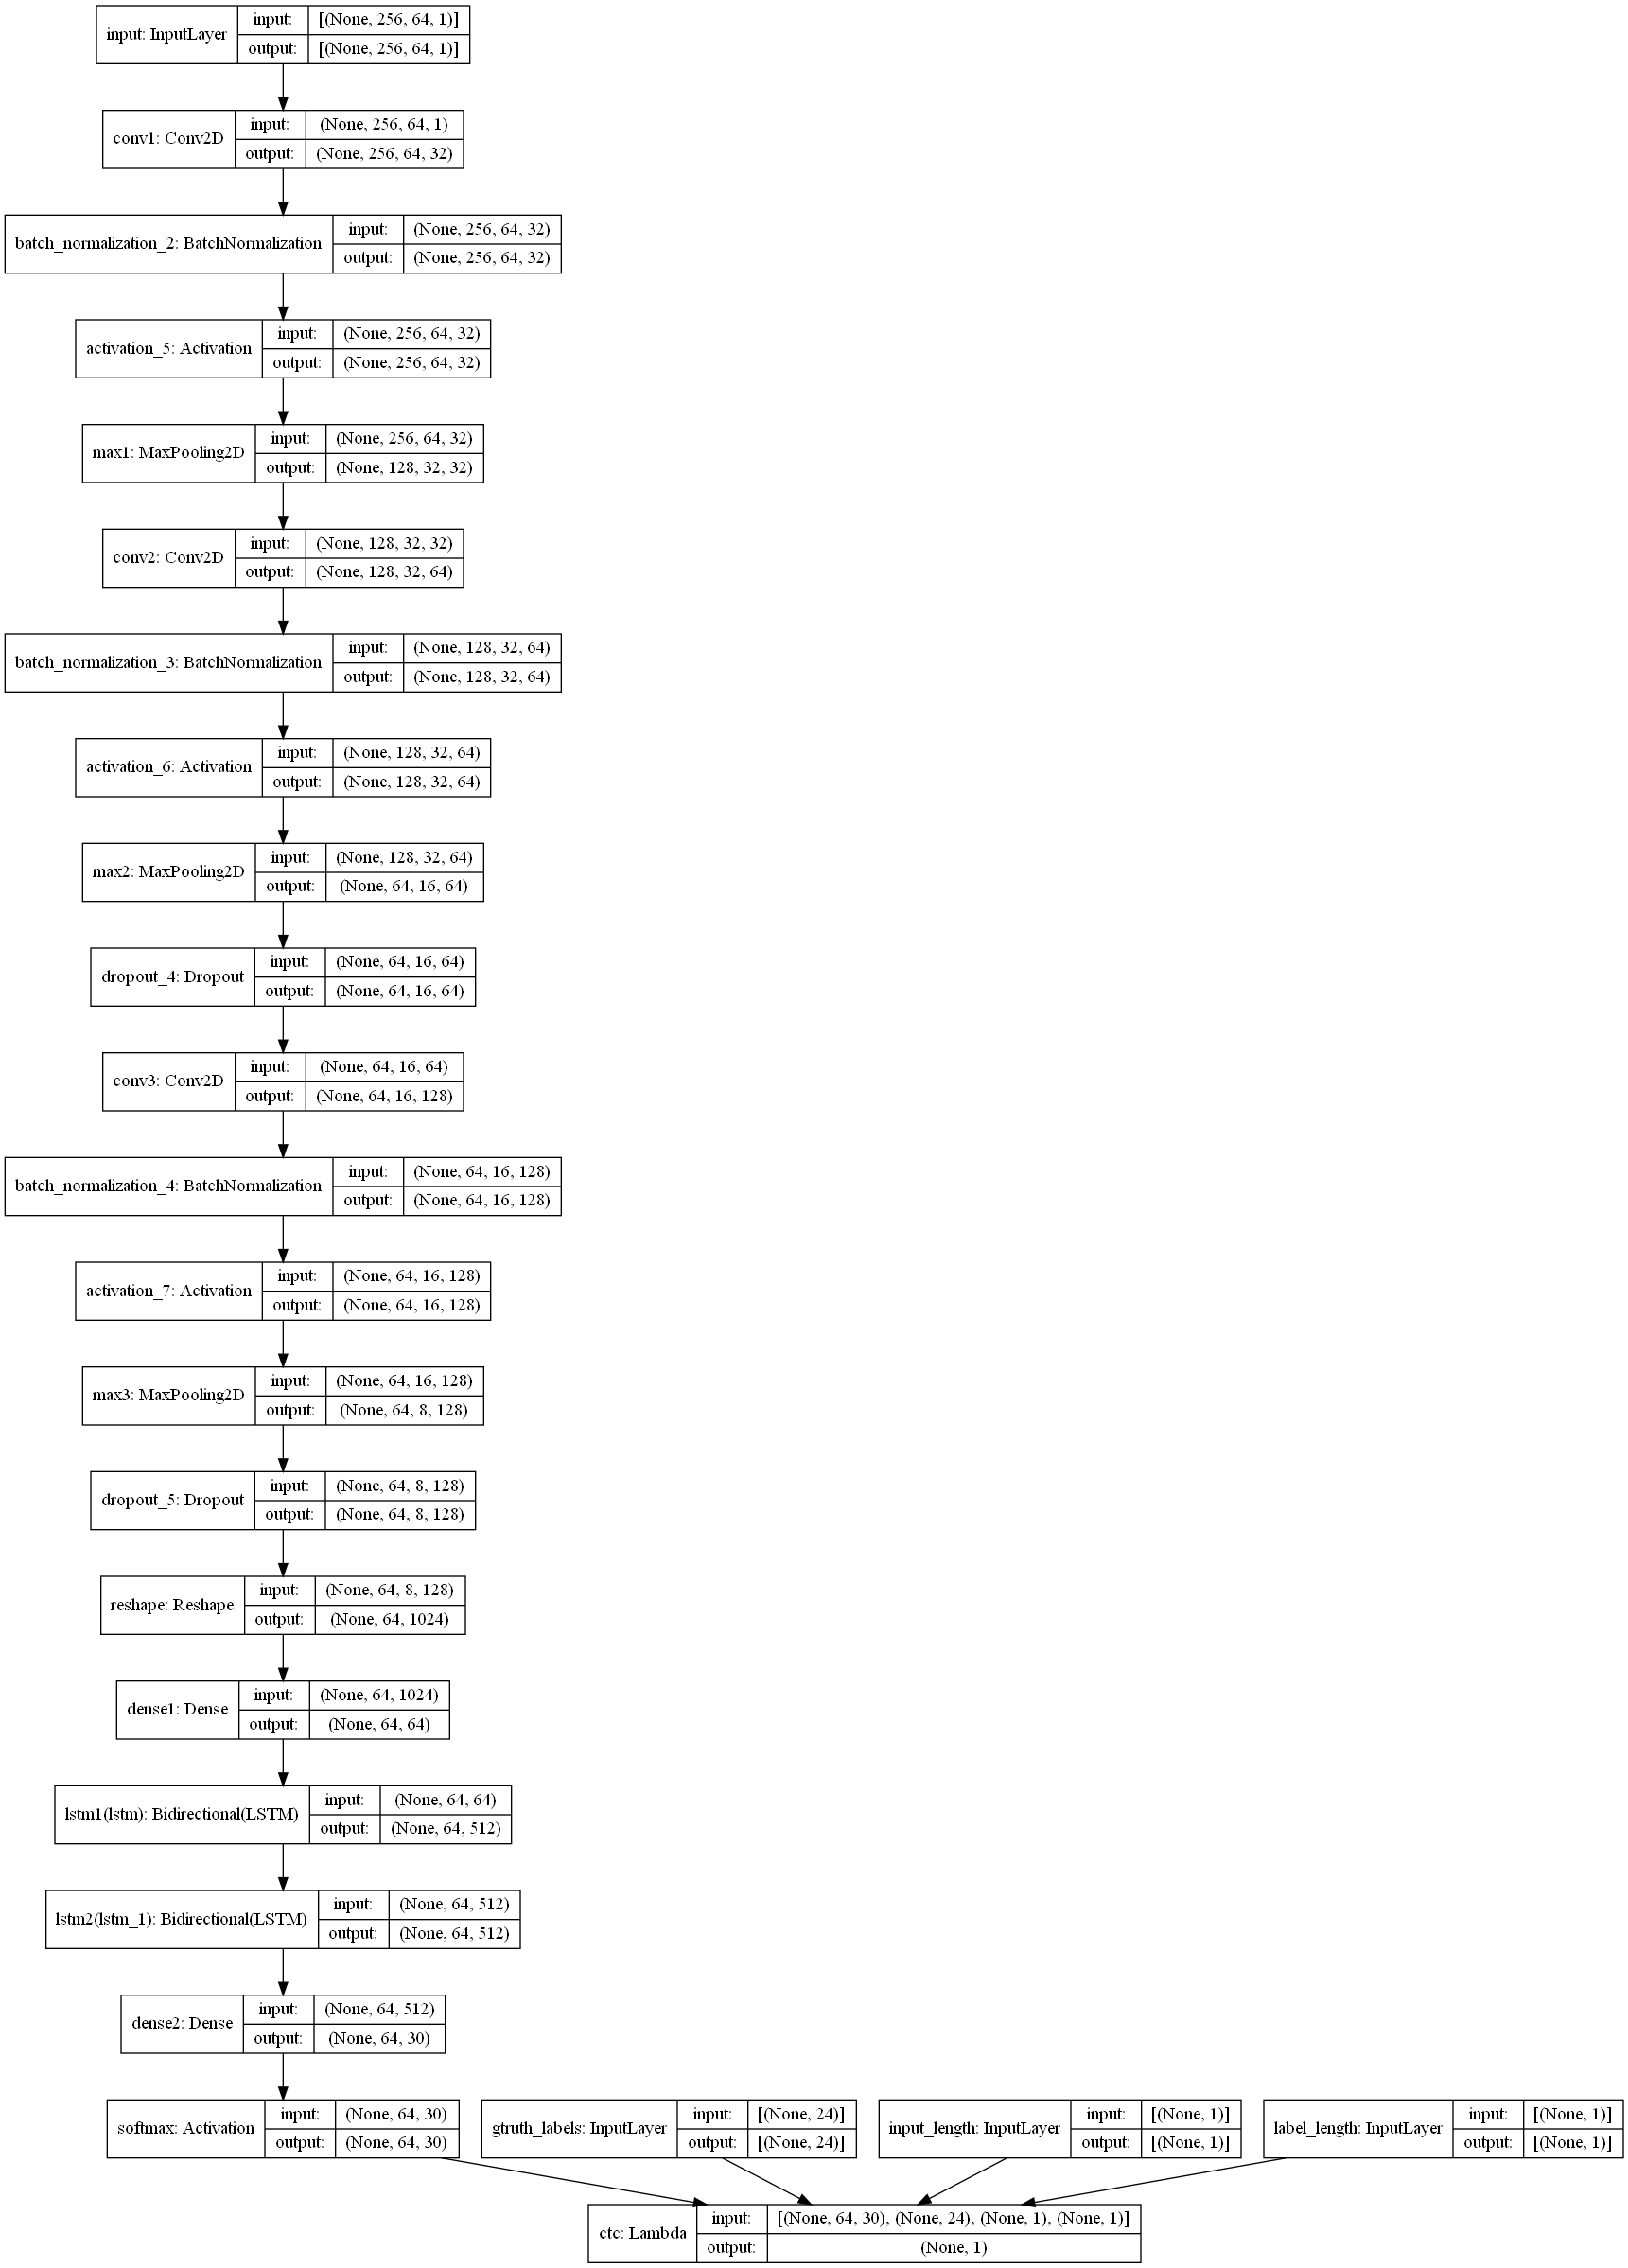

In [94]:
tf.keras.utils.plot_model(model_final,to_file="model_final.png", show_shapes=True)

### Plot loss & accuracy

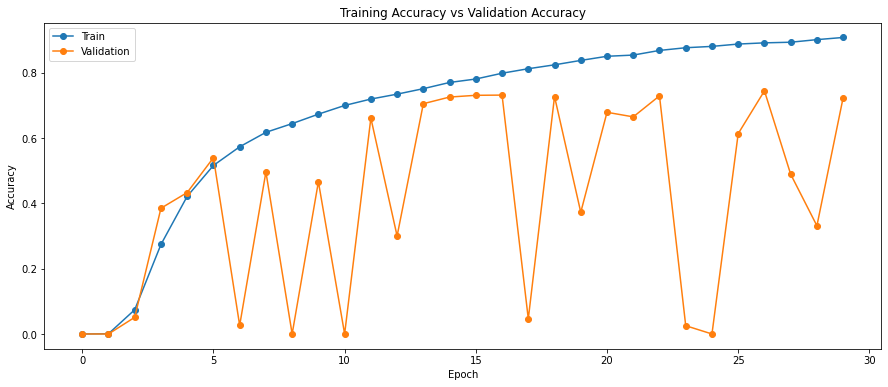

In [95]:
fig=plt.figure(figsize=(15,6))
plt.plot(crnn_history.history['accuracy'],marker='o')
plt.plot(crnn_history.history['val_accuracy'],marker='o')
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

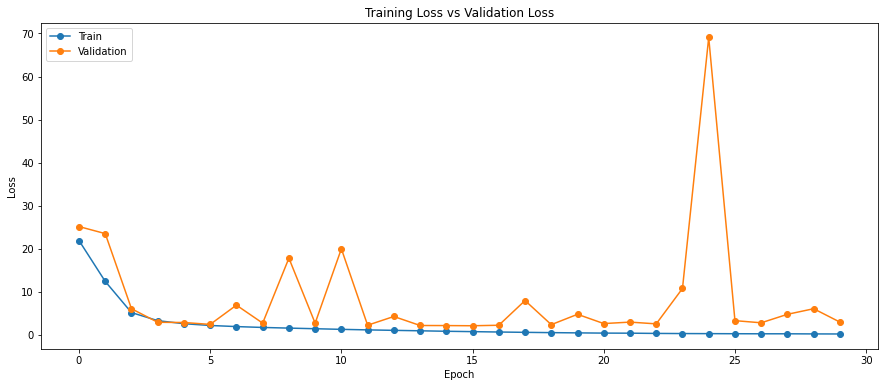

In [96]:
fig=plt.figure(figsize=(15,6))
plt.plot(crnn_history.history['loss'],marker='o')
plt.plot(crnn_history.history['val_loss'],marker='o')
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Find accuracy of predicted characters and predicted word

In [97]:
pred2 = crnn_model.predict(test_x)

In [98]:
decoded2 = K.get_value(K.ctc_decode(pred2, input_length=np.ones(pred2.shape[0])*pred2.shape[1], 
                                   greedy=True)[0][0])

prediction2 = []
for i in range(test_size):
    prediction2.append(number_to_character(decoded2[i]))

In [99]:
#To Find Accuracy of Predicted Characters and Predicted Word
y_true = test.loc[0:test_size-1, 'IDENTITY']
correct_char = 0
total_char = 0
correct = 0
y_true_char = []
y_pred_char = []

for i in range(len(y_true)):
    pr = prediction2[i]
    tr = y_true[i]
    total_char += len(tr)
    
    for j in range(min(len(tr), len(pr))):
        if tr[j] == pr[j]:
            correct_char += 1
        y_true_char.append(tr[j])
        y_pred_char.append(pr[j])
            
    if pr == tr :
        correct += 1 
  
print('Correct characters predicted : %.2f%%' %(correct_char*100/total_char))
print('Correct words predicted      : %.2f%%' %(correct*100/len(y_true)))

Correct characters predicted : 87.97%
Correct words predicted      : 72.20%


### Classification Report & Confusion Matrix

In [100]:
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import seaborn as sns

Classification Report
              precision    recall  f1-score   support

                   0.64      0.60      0.62        35
           '       1.00      1.00      1.00         1
           -       0.50      0.42      0.46        19
           A       0.90      0.92      0.91       799
           B       0.81      0.88      0.85       128
           C       0.91      0.92      0.91       214
           D       0.91      0.89      0.90       224
           E       0.91      0.91      0.91       806
           F       0.85      0.88      0.87        60
           G       0.91      0.90      0.90       106
           H       0.88      0.88      0.88       184
           I       0.90      0.89      0.89       524
           J       0.90      0.76      0.82        46
           K       0.87      0.89      0.88        46
           L       0.94      0.94      0.94       477
           M       0.80      0.88      0.84       258
           N       0.90      0.88      0.89       518
     

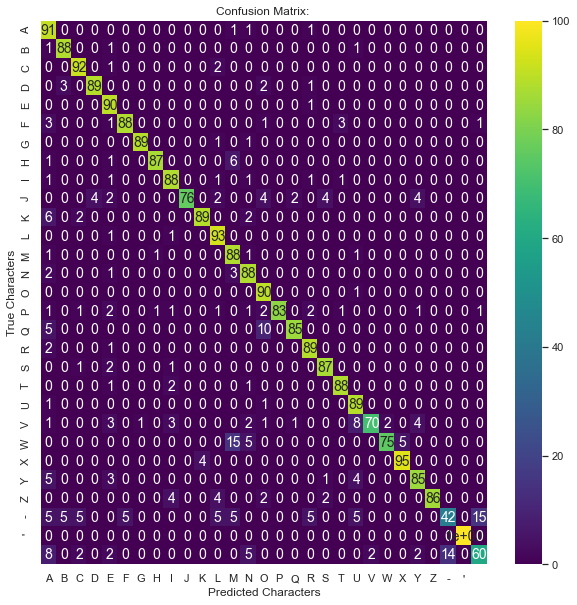

In [101]:
print("Classification Report")
print(classification_report(y_true_char,y_pred_char))

cm = (confusion_matrix(y_true_char,y_pred_char,labels = list(u"ABCDEFGHIJKLMNOPQRSTUVWXYZ-' "),normalize="true"))*100
df_cm = pd.DataFrame(cm,index = list(u"ABCDEFGHIJKLMNOPQRSTUVWXYZ-' "),columns = list(u"ABCDEFGHIJKLMNOPQRSTUVWXYZ-' "))
df_cm = df_cm.astype("int32")
sns.set(font_scale=1,rc={'figure.figsize':(10,10)})
sns.heatmap(df_cm,annot=True, annot_kws={"size": 14},cmap='viridis')
plt.title("Confusion Matrix: ")
plt.ylabel("True Characters")
plt.xlabel("Predicted Characters")
plt.show()

###  Jaro-Winkler Similarity

In [102]:
from Levenshtein import jaro_winkler

In [103]:
model = "CRNN_Predicted"
mse = mean_squared_error([ord(i) for i in y_true_char],[ord(i) for i in y_pred_char])
print("Mean Squared Error: ",model," ",str(round(mse, 2)))

clean_result = test.loc[0:valid_size-1, 'IDENTITY']
test_df = pd.Series(prediction2,name = model)

# Create 1 dataframe with both actual and OCR labels
ocr_vs_actual = pd.merge(clean_result, test_df, right_index=True,left_index=True)

# Remove labels which do not exist
ocr_vs_actual = ocr_vs_actual.loc[ocr_vs_actual[model].notnull(), :]

# Remove spaces in OCR output
ocr_vs_actual['IDENTITY'] = ocr_vs_actual['IDENTITY'].str.replace('\\s', '', regex=True)

# Create jaro-winkler similarity score
vectorized_jaro_winkler = np.vectorize(jaro_winkler)

ocr_vs_actual['SIMILARITY_SCORE'] = vectorized_jaro_winkler(ocr_vs_actual[model].str.upper(), np.where(ocr_vs_actual['IDENTITY'].isnull(), '',  ocr_vs_actual['IDENTITY'].str.upper()))
print("Similarity Score between True Label and Predicted Label: " + model)
display(ocr_vs_actual.head(25))

Mean Squared Error:  CRNN_Predicted   17.04
Similarity Score between True Label and Predicted Label: CRNN_Predicted


,IDENTITY,CRNN_Predicted,SIMILARITY_SCORE
0,KEVIN,KEVIN,1.000000
1,CLOTAIRE,LEMPTRY,0.601190
2,LENA,LENA,1.000000
3,JULES,JULES,1.000000
4,CHERPIN,CHERPIN,1.000000
5,MARTIN,MARTIN,1.000000
6,VALENTINE,VALENTINE,1.000000
7,LORAS,LORAS,1.000000
8,THIBAULT,THIBAULT,1.000000
9,AZABI,AZAOY,0.813333


### Histogram of Similarity Scores

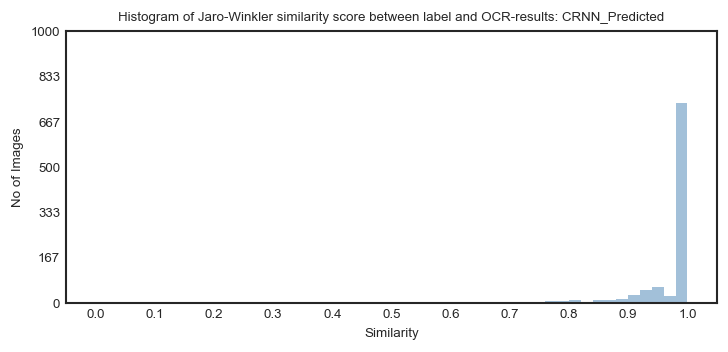

In [104]:
plt.style.use('seaborn-white')
plt.figure(figsize=(7,3), dpi=120)
plt.hist(ocr_vs_actual['SIMILARITY_SCORE'], bins=50, alpha=0.5, color='steelblue', edgecolor='none')
plt.title('Histogram of Jaro-Winkler similarity score between label and OCR-results: '+ model, fontsize=8)
plt.xlabel("Similarity",fontsize=8) 
plt.ylabel("No of Images",fontsize=8)
plt.xticks(np.arange(0, 1.1,0.1),fontsize=8)
plt.yticks(np.arange(0,len(ocr_vs_actual)+1,len(ocr_vs_actual)/6),fontsize=8)
plt.show()

### Some predictions on test set

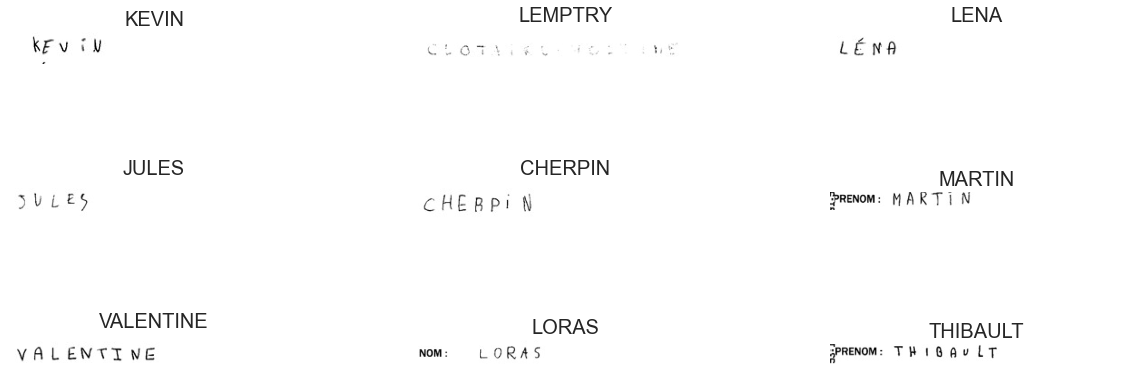

In [105]:
plt.figure(figsize=(20, 15))
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    img = 'test_v2/test/'+test.loc[i, 'FILENAME']
    image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    image = image_preprocessing(image)
    image = image/255
    prediction = crnn_model.predict(image.reshape(1, 256, 64, 1))
    names = K.get_value(K.ctc_decode(prediction, 
                                       input_length=np.ones(prediction.shape[0])*prediction.shape[1],greedy=True)[0][0])
    plt.title(number_to_character(names[0]), fontsize=20)
    plt.axis('off')
    
plt.subplots_adjust(wspace=0.4, hspace=-0.7)

* Extract the model as json format and its `weights` as h5 format.

In [106]:
# saving the crnn_model to json format in our directory
open('crnn_model.json', 'w').write(crnn_model.to_json())

9468

In [107]:
# saving the weights of the crnn_model in our directory
crnn_model.save_weights('crnn_model_weights.h5')

## Pre-trained Models for Image Classification

The pre-trained models are trained on very large scale image classification problems. The convolutional layers act as feature extractor and the fully connected layers act as Classifiers. Since these models are very large and have seen a huge number of images, they tend to learn very good, discriminative features.

(Reference: https://learnopencv.com/keras-tutorial-transfer-learning-using-pre-trained-models/).

* Processing data to make it compitable with the pre-trained models that we will use

In [108]:
def image_preprocessing2(image):
    # save the dimensions of the array (height - width) 
    (h, w) = image.shape
    # blank white image
    final_img = np.ones([128, 128])*255 
    # crop images that have width higher than 128
    if w > 128:
        image = image[:, :128]
    # crop images that have height greater than 128
    if h > 128:
        image = image[:128, :]
    final_img[:h, :w] = image
    # rotate the image by 90 degrees clockwise
    return cv2.rotate(final_img, cv2.ROTATE_90_CLOCKWISE)

In [109]:
train_size_vgg=30000
valid_size_vgg=3000

In [110]:
train_xvgg = []

for i in range(train_size_vgg):
    img_dir = 'train_v2/train/'+train.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = image_preprocessing2(image)
    image = image/255
    train_xvgg.append(image)

In [111]:
train_xvgg = np.array(train_xvgg).reshape(-1, 128, 128, 3)
train_xvgg.shape

(10000, 128, 128, 3)

In [112]:
valid_xvgg = []

for i in range(valid_size_vgg):
    img_dir = 'validation_v2/validation/'+validation.loc[i, 'FILENAME']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = image_preprocessing2(image)
    image = image/255.
    valid_xvgg.append(image)

In [113]:
valid_xvgg = np.array(valid_xvgg).reshape(-1, 128, 128, 3)
valid_xvgg.shape

(1000, 128, 128, 3)

In [114]:
train_size_vgg=10000
valid_size_vgg=1000

In [115]:
train_yvgg = np.ones([train_size_vgg, max_len_labels]) * -1
train_label_len = np.zeros([train_size_vgg, 1])
train_input_len = np.ones([train_size_vgg, 1]) * (num_predicted_labels-2)
train_output = np.zeros([train_size_vgg])

for i in range(train_size_vgg):
    train_label_len[i] = len(train.loc[i, 'IDENTITY'])
    train_yvgg[i, 0:len(train.loc[i, 'IDENTITY'])]= character_to_number(train.loc[i, 'IDENTITY'])  

In [116]:
valid_yvgg = np.ones([valid_size_vgg, max_len_labels]) * -1
valid_label_len = np.zeros([valid_size_vgg, 1])
valid_input_len = np.ones([valid_size_vgg, 1]) * (num_predicted_labels-2)
valid_output = np.zeros([valid_size_vgg])

for i in range(valid_size_vgg):
    valid_label_len[i] = len(validation.loc[i, 'IDENTITY'])
    valid_yvgg[i, 0:len(validation.loc[i, 'IDENTITY'])]= character_to_number(validation.loc[i, 'IDENTITY']) 

In [117]:
train_yvgg.shape, valid_yvgg.shape

((10000, 24), (1000, 24))

### 1. VGG-16 Model

In [118]:
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications import vgg16

In [119]:
#Load the VGG-16 model
vgg_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3), classes=24)

In [120]:
#since we don’t have to train all the layers, we make them non_trainable
for layer in vgg_model.layers:
    layer.trainable = False 

In [121]:
vgg16_model = Sequential()

vgg16_model.add(vgg_model)
vgg16_model.add(Flatten())
vgg16_model.add(Dense(256, use_bias=False))
vgg16_model.add(BatchNormalization())
vgg16_model.add(Activation("relu"))
vgg16_model.add(Dropout(0.5))
vgg16_model.add(Dense(24, activation = "softmax"))

In [122]:
#compile the model
vgg16_model.compile(loss=tf.keras.losses.MeanAbsoluteError(),optimizer='adam',metrics=['accuracy'])

In [123]:
vgg16_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097152   
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
activation_8 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)               

In [124]:
m = vgg16_model.fit(train_xvgg,train_yvgg,epochs=30,batch_size=128, verbose=1,validation_data=(valid_xvgg,valid_yvgg), callbacks=es)

Epoch 1/30
79/79 [==============================] - 426s 5s/step - loss: 3.4350 - accuracy: 0.1712 - val_loss: 3.4658 - val_accuracy: 0.1940
Epoch 2/30
79/79 [==============================] - 408s 5s/step - loss: 3.4297 - accuracy: 0.1822 - val_loss: 3.4659 - val_accuracy: 0.1840
Epoch 3/30
79/79 [==============================] - 415s 5s/step - loss: 3.4293 - accuracy: 0.1786 - val_loss: 3.4653 - val_accuracy: 0.1890
Epoch 4/30
79/79 [==============================] - 425s 5s/step - loss: 3.4288 - accuracy: 0.1828 - val_loss: 3.4656 - val_accuracy: 0.1960
Epoch 5/30
79/79 [==============================] - 426s 5s/step - loss: 3.4285 - accuracy: 0.1799 - val_loss: 3.4653 - val_accuracy: 0.1950
Epoch 6/30
79/79 [==============================] - 424s 5s/step - loss: 3.4284 - accuracy: 0.1875 - val_loss: 3.4660 - val_accuracy: 0.1740
Epoch 7/30
79/79 [==============================] - 418s 5s/step - loss: 3.4282 - accuracy: 0.1885 - val_loss: 3.4657 - val_accuracy: 0.1790
Epoch 8/30
79

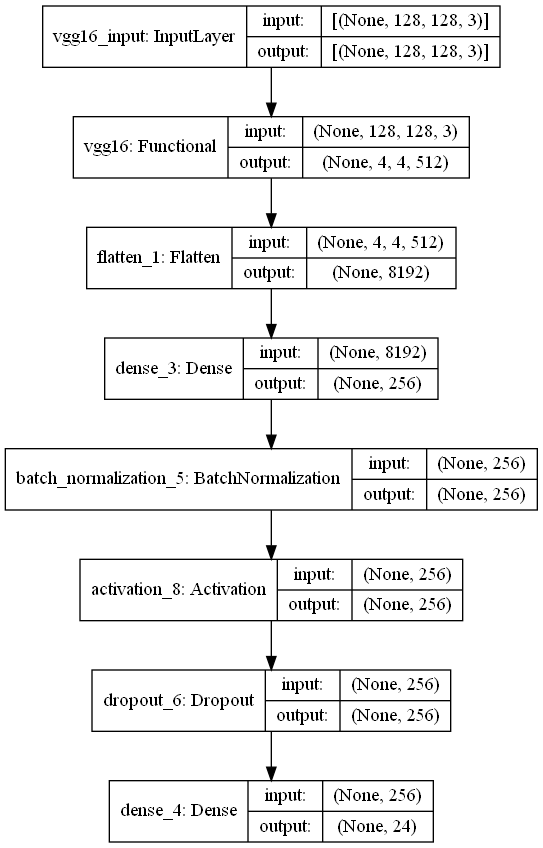

In [125]:
tf.keras.utils.plot_model(vgg16_model,to_file="VGG16_1.png", show_shapes=True) 

### 2. VGG-19 Model

In [126]:
from tensorflow.keras.applications.vgg19 import VGG19
from keras.applications import vgg19

In [127]:
#Load the VGG-16 model
vgg_model = vgg19.VGG19(weights='imagenet', include_top=False, input_shape=(128,128,3), classes=24)

In [128]:
#since we don’t have to train all the layers, we make them non_trainable
for layer in vgg_model.layers:
    layer.trainable = False 

In [129]:
vgg19_model = Sequential()

vgg19_model.add(vgg_model)
vgg19_model.add(Flatten())
vgg19_model.add(Dense(256, use_bias=False))
vgg19_model.add(BatchNormalization())
vgg19_model.add(Activation("relu"))
vgg19_model.add(Dropout(0.5))
vgg19_model.add(Dense(24, activation = "softmax"))

In [130]:
#compile the model
vgg19_model.compile(loss=tf.keras.losses.MeanAbsoluteError(),optimizer='adam',metrics=['accuracy'])

In [131]:
vgg19_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097152   
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
activation_9 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)               

In [132]:
m = vgg19_model.fit(train_xvgg,train_yvgg,epochs=30,batch_size=128, verbose=1,validation_data=(valid_xvgg,valid_yvgg), callbacks=es)

Epoch 1/30
79/79 [==============================] - 532s 7s/step - loss: 3.4370 - accuracy: 0.1740 - val_loss: 3.4654 - val_accuracy: 0.1970
Epoch 2/30
79/79 [==============================] - 527s 7s/step - loss: 3.4295 - accuracy: 0.1891 - val_loss: 3.4645 - val_accuracy: 0.1920
Epoch 3/30
79/79 [==============================] - 528s 7s/step - loss: 3.4291 - accuracy: 0.1851 - val_loss: 3.4643 - val_accuracy: 0.1900
Epoch 4/30
79/79 [==============================] - 534s 7s/step - loss: 3.4287 - accuracy: 0.1886 - val_loss: 3.4648 - val_accuracy: 0.1780
Epoch 5/30
79/79 [==============================] - 529s 7s/step - loss: 3.4285 - accuracy: 0.1875 - val_loss: 3.4644 - val_accuracy: 0.1960
Epoch 6/30
79/79 [==============================] - 525s 7s/step - loss: 3.4284 - accuracy: 0.1884 - val_loss: 3.4646 - val_accuracy: 0.1790
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping


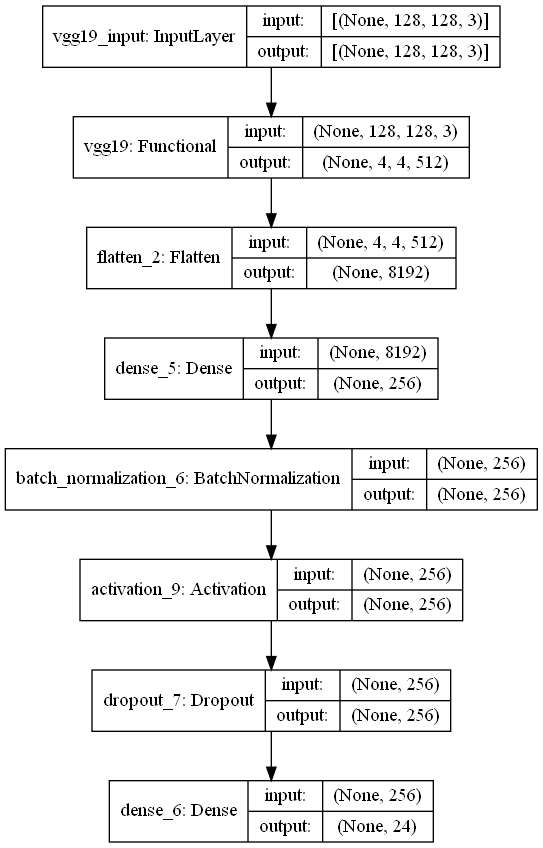

In [133]:
tf.keras.utils.plot_model(vgg19_model,to_file="VGG19_1.png", show_shapes=True) 

### 3. ResNet50 Model

In [134]:
from tensorflow.keras.applications import ResNet50
from tensorflow import keras
from tensorflow.keras import layers

In [135]:
resnet_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (128,128,3))

In [136]:
#we are using only the basic ResNet model, so we will keep the layers frozen and only modify the last layer
for layer in resnet_model.layers:
    layer.trainable = False

In [137]:
resnet50_model = Sequential()

resnet50_model.add(resnet_model)
resnet50_model.add(Flatten())
resnet50_model.add(Dense(256, use_bias=False))
resnet50_model.add(BatchNormalization())
resnet50_model.add(Activation("relu"))
resnet50_model.add(Dropout(0.5))
resnet50_model.add(Dense(128, use_bias=False))
resnet50_model.add(BatchNormalization())
resnet50_model.add(Activation("relu"))
resnet50_model.add(Dropout(0.5))
resnet50_model.add(Dense(64, use_bias=False))
resnet50_model.add(BatchNormalization())
resnet50_model.add(Activation("relu"))
resnet50_model.add(Dropout(0.5))
resnet50_model.add(Dense(24, activation = "softmax"))

In [138]:
#compile the model
optimizerResNet = keras.optimizers.Adam(learning_rate = 0.001)
resnet50_model.compile(loss=tf.keras.losses.MeanAbsoluteError(),optimizer=optimizerResNet,metrics=['accuracy'])

In [139]:
resnet50_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               8388608   
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
activation_10 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)              

In [140]:
history_ResNet = resnet50_model.fit(train_xvgg,train_yvgg, epochs = 30, batch_size=128,
                                validation_data = (valid_xvgg,valid_yvgg),
                                callbacks = es) 


Epoch 1/30
79/79 [==============================] - 178s 2s/step - loss: 3.4583 - accuracy: 0.1438 - val_loss: 3.4722 - val_accuracy: 0.1520
Epoch 2/30
79/79 [==============================] - 174s 2s/step - loss: 3.4348 - accuracy: 0.1888 - val_loss: 3.4694 - val_accuracy: 0.1520
Epoch 3/30
79/79 [==============================] - 175s 2s/step - loss: 3.4316 - accuracy: 0.1962 - val_loss: 3.4690 - val_accuracy: 0.1520
Epoch 4/30
79/79 [==============================] - 173s 2s/step - loss: 3.4309 - accuracy: 0.1910 - val_loss: 3.4689 - val_accuracy: 0.1610
Epoch 5/30
79/79 [==============================] - 176s 2s/step - loss: 3.4302 - accuracy: 0.1925 - val_loss: 3.4671 - val_accuracy: 0.1600
Epoch 6/30
79/79 [==============================] - 175s 2s/step - loss: 3.4298 - accuracy: 0.1944 - val_loss: 3.4655 - val_accuracy: 0.1520
Epoch 7/30
79/79 [==============================] - 174s 2s/step - loss: 3.4292 - accuracy: 0.1925 - val_loss: 3.4655 - val_accuracy: 0.1520
Epoch 8/30
79

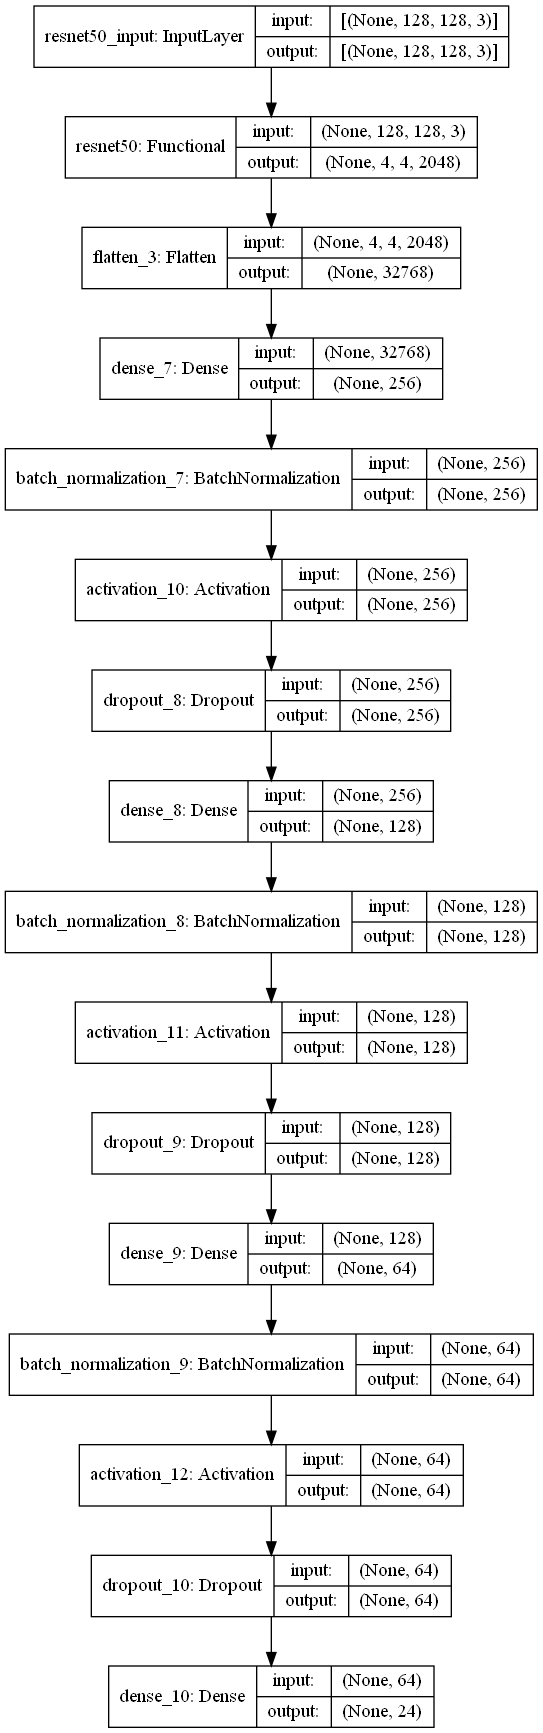

In [141]:
tf.keras.utils.plot_model(resnet50_model,to_file="ResNet.png", show_shapes=True) 